In [2]:
pip install pandas scikit-learn joblib


Note: you may need to restart the kernel to use updated packages.


In [23]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# Load the dataset
df = pd.read_csv("C:/Users/USER/Desktop/projects/encryptix/IMDb Movies India.csv", encoding='ISO-8859-1')
print(df.head())

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

In [5]:
# Drop rows with missing ratings since that's our target variable
data_cleaned = df.dropna(subset=['Rating'])

In [6]:
# Extract relevant features and the target variable
features = data_cleaned[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Duration']]
target = data_cleaned['Rating']

In [7]:
# Convert Duration to numerical format (remove ' min' and convert to int)
features['Duration'] = features['Duration'].str.replace(' min', '')
features['Duration'] = pd.to_numeric(features['Duration'], errors='coerce')

C:\Users\USER\AppData\Local\Temp\ipykernel_13932\2527588295.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Duration'] = features['Duration'].str.replace(' min', '')
C:\Users\USER\AppData\Local\Temp\ipykernel_13932\2527588295.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Duration'] = pd.to_numeric(features['Duration'], errors='coerce')


In [8]:
# Combine features and target into a single DataFrame for coordinated dropping of missing values
combined = pd.concat([features, target], axis=1).dropna()

In [9]:
# Separate features and target after dropping missing values
features = combined[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Duration']]
target = combined['Rating']

In [10]:

# Handle missing values for categorical columns by filling them with 'Unknown'
features.fillna('Unknown', inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_13932\3506908627.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.fillna('Unknown', inplace=True)


In [11]:
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [12]:
# Preprocess the data: encode categorical variables and impute missing values
categorical_features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
numerical_features = ['Duration']


In [13]:
# Create transformers for the pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])



In [14]:
# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [15]:
# Create a pipeline with the preprocessor and a regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [16]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['Duration']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Genre', 'Director',
                                                   'Actor 1', 'Actor 2',
                                                   'Actor 3'])])),
                ('regressor', LinearRegression())])

In [17]:
# Predict and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 10.102917988087373


In [21]:
# Function to take user input and predict the rating
def predict_rating():
    genre = input("Enter Genre: ")
    director = input("Enter Director: ")
    actor_1 = input("Enter Actor 1: ")
    actor_2 = input("Enter Actor 2: ")
    actor_3 = input("Enter Actor 3: ")
    duration = float(input("Enter Duration (in minutes): "))

    user_input = pd.DataFrame([[genre, director, actor_1, actor_2, actor_3, duration]],
                              columns=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Duration'])
    user_input.fillna('Unknown', inplace=True)

    prediction = model.predict(user_input)
    print(f"Predicted Rating: {prediction[0]}")

# Predict rating for user input
predict_rating()

ValueError: could not convert string to float: ''

**EXPLORATORY ANALYSIS**


**Heat Map**

In [ ]:
numerical_features = combined[['Duration', 'Rating']]

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

AttributeError: 'list' object has no attribute 'corr'

<Figure size 1000x600 with 0 Axes>

**Histogram**

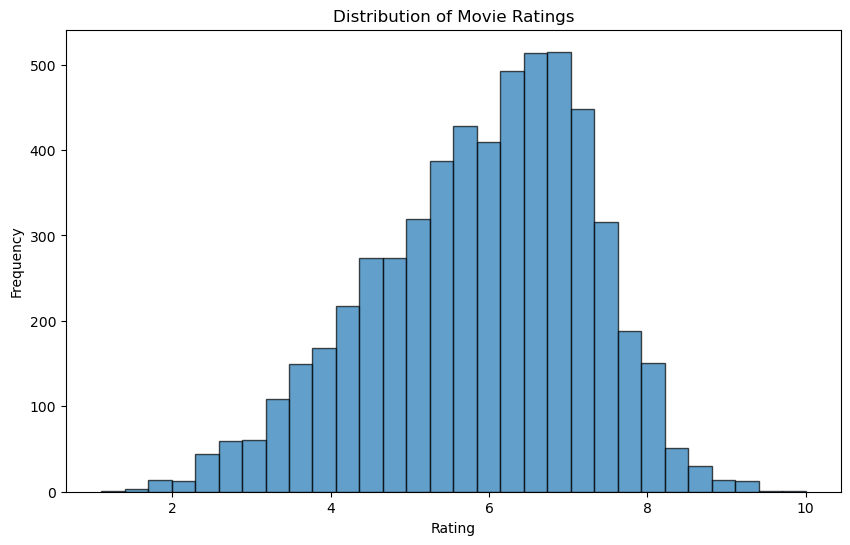

In [24]:
# Combine features and target into a single DataFrame for coordinated dropping of missing values
combined = pd.concat([features, target], axis=1).dropna()

# Plotting a histogram of the ratings
plt.figure(figsize=(10, 6))
plt.hist(combined['Rating'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()